In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.preprocessing import PowerTransformer

**Data Desctription & Visualization**

In [2]:
df_song = pd.read_csv('Dataset/song_data.csv')
df_song.rename(columns={'song_id': 'music_id'}, inplace=True)
df_song

,music_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
...,...,...,...,...,...
999995,SOTXAME12AB018F136,O Samba Da Vida,Pacha V.I.P.,Kiko Navarro,0
999996,SOXQYIQ12A8C137FBB,Jago Chhadeo,Naale Baba Lassi Pee Gya,Kuldeep Manak,0
999997,SOHODZI12A8C137BB3,Novemba,Dub_Connected: electronic music,Gabriel Le Mar,0
999998,SOLXGOR12A81C21EB7,Faraday,The Trance Collection Vol. 2,Elude,0


In [3]:
file_path = 'Dataset/10000.txt'
df_user = pd.read_csv(file_path, sep='\t', header=None, names=['user_id', 'music_id', 'play_count'])
df_user  

,user_id,music_id,play_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
...,...,...,...
1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2
1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4
1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3
1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1


In [5]:
user_count = df_user.user_id.nunique()
music_count = df_user.music_id.nunique()
print('user_count: ', user_count)
print('music_count: ', music_count)

user_count:  76353
music_count:  10000


In [6]:
df_user.play_count.describe().reset_index().T

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
play_count,2000000.0,3.045485,6.57972,1.0,1.0,1.0,3.0,2213.0


In [7]:
def describe_play_count(more_than=0, less_than=math.inf):
    cond = (df_user.play_count >= more_than) & (df_user.play_count < less_than)
    unique_user = df_user.user_id[cond].unique().shape[0]
    of_total_play_count = df_user.play_count[cond].count()/df_user.shape[0]
    print(f"({more_than} >= playCount < {less_than}) Unique user: {unique_user}")
    print(f"{of_total_play_count:.2%} of total play count")
    display(df_user[cond].play_count.describe().reset_index().T)

In [8]:
describe_play_count(0,10)
describe_play_count(10,50)
describe_play_count(50,100)
describe_play_count(100,200)
describe_play_count(200,500)
describe_play_count(500,1000)
describe_play_count(1000,2214)

(0 >= playCount < 10) Unique user: 76241
94.30% of total play count


,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
play_count,1885963.0,2.020525,1.720807,1.0,1.0,1.0,2.0,9.0


(10 >= playCount < 50) Unique user: 31388
5.45% of total play count


,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
play_count,109019.0,17.13272,8.177559,10.0,11.0,14.0,20.0,49.0


(50 >= playCount < 100) Unique user: 2903
0.21% of total play count


,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
play_count,4148.0,65.283269,13.04571,50.0,54.0,61.0,74.0,99.0


(100 >= playCount < 200) Unique user: 572
0.04% of total play count


,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
play_count,728.0,131.252747,26.13865,100.0,109.0,124.0,149.0,199.0


(200 >= playCount < 500) Unique user: 114
0.01% of total play count


,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
play_count,129.0,278.852713,71.679528,200.0,224.0,255.0,319.0,488.0


(500 >= playCount < 1000) Unique user: 10
0.00% of total play count


,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
play_count,12.0,667.5,136.715697,500.0,577.0,656.5,711.25,920.0


(1000 >= playCount < 2214) Unique user: 1
0.00% of total play count


,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
play_count,1.0,2213.0,NaN,2213.0,2213.0,2213.0,2213.0,2213.0


In [9]:
def normalize_log_play_count(base=2.718281828459, bins=20):
    play_count_norm = np.array(df_user.play_count)
    play_count_norm = play_count_norm
    play_count_norm = np.emath.logn(base, play_count_norm)
    # scanle to [1, 5]
    play_count_norm = (play_count_norm - play_count_norm.min()) / (play_count_norm.max() - play_count_norm.min()) * 4 + 1
    # play_count_norm = ((play_count_norm - play_count_norm.min()) * (5-1))/ (play_count_norm.max() - play_count_norm.min())
    

    plt.figure(figsize=(8, 5))
    plt.hist(play_count_norm, bins=bins)
    plt.xlabel(f'base {base} log play_count')
    plt.show()

    new_df = df_user.copy()
    new_df.play_count = play_count_norm
    new_df.rename(columns={"play_count": "rating"}, inplace=True)
    return new_df

def normalize_range_play_count(a=1, b=5, bins=20):
    pt = PowerTransformer(method="box-cox")
    new_df = df_user.copy()
    new_df[["play_count"]] = pd.DataFrame(pt.fit_transform(new_df[["play_count"]]), columns=["play_count"])
    new_df[["play_count"]] = a + (((new_df[["play_count"]] - new_df[["play_count"]].min()) * (b - a)) / (new_df[["play_count"]].max() - new_df[["play_count"]].min()))


    # # normalize play_count to range [1, 5]
    # play_count_norm = np.array(df_user.play_count)
    
    # plt.figure(figsize=(8, 5))
    # plt.hist(play_count_norm)
    # plt.xlabel(f'normalized play_count')
    # plt.show()

    # new_df = df_user.copy()
    # new_df.play_count = play_count_norm
    new_df.rename(columns={"play_count": "rating"}, inplace=True)
    plt.figure(figsize=(8, 5))
    plt.hist(new_df['rating'], bins=bins)
    # plt.xlabel(f'base {base} log play_count')
    plt.show()
    # new_df['rating'].figure(figsize=(8, 5))
    return new_df

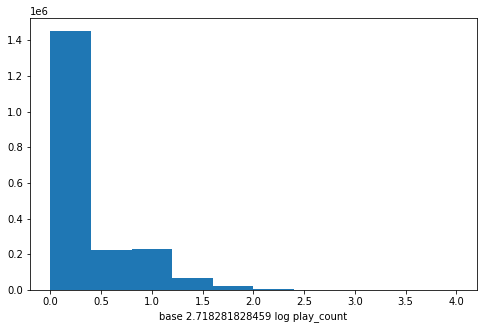

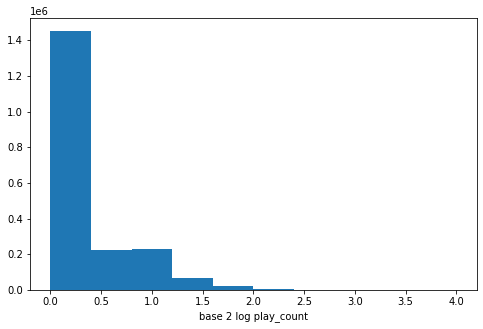

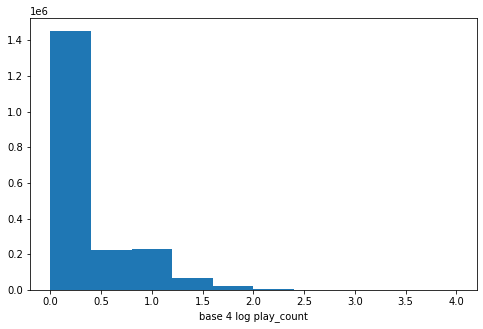

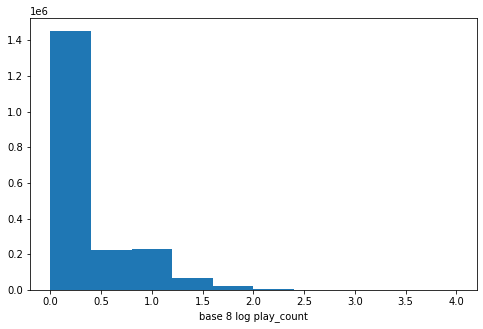

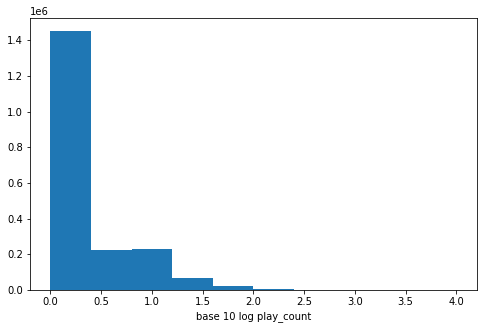

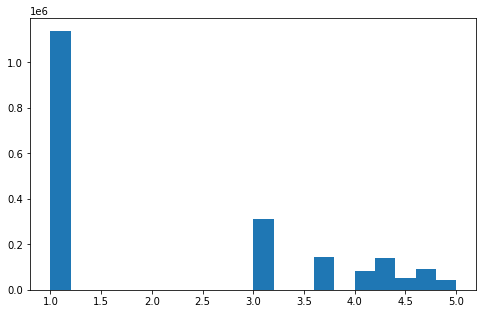

In [10]:
df_log_e = normalize_log_play_count(bins=10)
df_log_2 = normalize_log_play_count(2, 10)
df_log_4 = normalize_log_play_count(4, 10)
df_log_8 = normalize_log_play_count(8, 10)
df_log_10 = normalize_log_play_count(10, 10)
df_power_transform = normalize_range_play_count()

In [163]:
# df_log_e[(df_log_e.rating >= 4) & (df_log_e.rating < 5)]
# df_log_e[(df_log_e.rating >= 5)].describe()
# df_log_4[(df_log_4.rating < 1)].sort_values(by='rating', ascending=True)
# df_log_8.describe()

df_power_transform.describe()

,rating
count,2.000000e+06
mean,2.216346e+00
std,1.460205e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.743918e+00
max,5.000000e+00


In [14]:
df_log_e.to_csv('Dataset/preprocessed_data_log_e.csv', index=False)
df_log_2.to_csv('Dataset/preprocessed_data_log_2.csv', index=False)
df_log_4.to_csv('Dataset/preprocessed_data_log_4.csv', index=False)
df_log_8.to_csv('Dataset/preprocessed_data_log_8.csv', index=False)
df_log_10.to_csv('Dataset/preprocessed_data_log_10.csv', index=False)
df_power_transform.to_csv('Dataset/preprocessed_data_power_transform.csv', index=False)

**Preprocessing Data**

In [174]:
def categorize_play_count(play_count):    
    if play_count < 3: # was 10
        return 1
    elif play_count < 20: # was 25
        return 2   
    elif play_count < 100:
        return 3
    elif play_count < 200:
        return 4
    else:
        return 5

data_categorized = df_user.copy()
data_categorized['rating'] = df_user.play_count.apply(categorize_play_count)
data_categorized.drop(columns=['play_count'], inplace=True)
print(len(data_categorized[data_categorized['rating'] == 1]))
print(len(data_categorized[data_categorized['rating'] == 2]))
print(len(data_categorized[data_categorized['rating'] == 3]))
print(len(data_categorized[data_categorized['rating'] == 4]))
print(len(data_categorized[data_categorized['rating'] == 5]))

1451476
514074
33580
728
142


In [172]:
pr_data = data_categorized.drop_duplicates(subset=['rating'], keep='last')
pr_data

,rating
count,1.0
mean,1.0
std,NaN
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


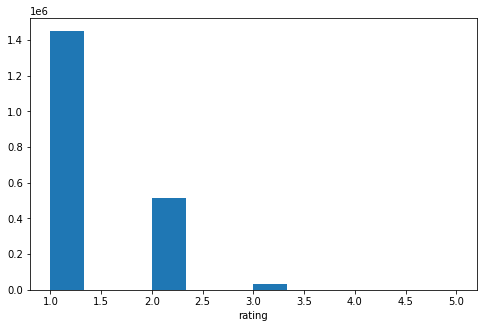

In [175]:
plt.figure(figsize=(8, 5))
plt.hist(data_categorized.rating, bins=12)
plt.xlabel('rating')
plt.show()

In [177]:
data_categorized.to_csv('Dataset/preprocessed_data_categorized.csv', index=False)